# Clustering Homework
- Execute the below code and complete the following questions. __DO NOT commit the csv file__ 

In [1]:
import pandas as pd
from sklearn.datasets import make_classification
import numpy as np

def generate_data():
    X, y = make_classification(n_samples=4000, 
                          n_features=50, 
                          n_redundant=30, 
                          n_repeated=2,
                          n_classes=2,
                          n_clusters_per_class=1,
                          class_sep = 0.9,
                          random_state = 1200,
                          scale=1
                         )

    colNames = ['var'+str(x) for x in range(50)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((X,y.reshape(-1,1)), axis=1), columns=colNames)
    
    df['var0'] = np.where(df['var0'] < 0, 'a', np.where(df['var0'] < 0.5, 'b', 'c'))
    df['var1'] = np.where(df['var1'] < -.5, 'd', np.where(df['var1'] < 0.4, 'e', 'f'))
    df['var2'] = np.where(df['var2'] < 0, 'g', np.where(df['var2'] < 0.5, 'h', 'i'))

    df.to_csv('clustering-data.csv', index=False)

generate_data()

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('clustering-data.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var41,var42,var43,var44,var45,var46,var47,var48,var49,target
0,a,d,g,-0.396805,0.678895,0.726830,-0.640008,-1.039820,-0.934986,-0.098290,...,-0.268735,0.070548,0.808570,1.523755,-0.497207,0.470146,1.095665,-0.339445,0.470146,1.0
1,a,d,i,-0.991416,2.359730,-0.993249,-2.486560,-3.793524,-3.316669,-0.456288,...,0.500165,0.348498,3.031635,-0.996257,-1.832063,1.907786,4.046193,-1.076047,1.907786,0.0
2,a,d,g,-2.075731,0.544290,-0.854121,-0.615142,-0.903471,-0.775623,-0.123449,...,0.207872,0.096783,0.734387,0.564490,-0.439069,0.483492,0.971048,-0.231717,0.483492,0.0
3,b,e,i,0.330885,1.100425,1.468506,0.456396,-0.663287,-1.134611,0.494358,...,0.963910,-0.474539,0.049557,-0.169026,-0.213812,-0.798086,0.419922,-1.142086,-0.798086,1.0
4,a,d,h,2.245218,1.039071,0.481155,-1.373746,-1.861215,-1.531545,-0.322933,...,0.040232,0.263376,1.570320,0.212608,-0.917244,1.131278,2.034796,-0.363342,1.131278,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    4000 non-null   object 
 1   var1    4000 non-null   object 
 2   var2    4000 non-null   object 
 3   var3    4000 non-null   float64
 4   var4    4000 non-null   float64
 5   var5    4000 non-null   float64
 6   var6    4000 non-null   float64
 7   var7    4000 non-null   float64
 8   var8    4000 non-null   float64
 9   var9    4000 non-null   float64
 10  var10   4000 non-null   float64
 11  var11   4000 non-null   float64
 12  var12   4000 non-null   float64
 13  var13   4000 non-null   float64
 14  var14   4000 non-null   float64
 15  var15   4000 non-null   float64
 16  var16   4000 non-null   float64
 17  var17   4000 non-null   float64
 18  var18   4000 non-null   float64
 19  var19   4000 non-null   float64
 20  var20   4000 non-null   float64
 21  var21   4000 non-null   float64
 22  

# Data Definitions
- `var0` - `var49`: some feature that could be used to describe the `target`.  
- `target`: variable that contains the classes. This is your target variable.

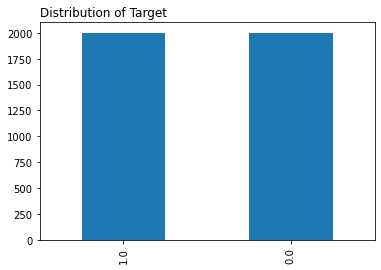

In [4]:
df.target.value_counts().plot.bar()
plt.title('Distribution of Target', loc='left')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X = df[[x for x in df.columns if x != 'target']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2303)

print(f'Training examples: {X_train.shape[0]}')
print(f'Test examples: {X_test.shape[0]}')
print('\nFeature names:')
print(*X.columns, sep='\t')

Training examples: 3200
Test examples: 800

Feature names:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19	var20	var21	var22	var23	var24	var25	var26	var27	var28	var29	var30	var31	var32	var33	var34	var35	var36	var37	var38	var39	var40	var41	var42	var43	var44	var45	var46	var47	var48	var49


# Question 1
- Using `X_train`, you will perform k-means clustering using best practices.  
- Determine what the "optimum" number of clusters is - support your answer.  
- Visualize the results of your clustering using PCA.
- Based on the visualization, how do you interpret the clustering result?

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [11]:
# One-hot encode the categorical features
encoder = OneHotEncoder(sparse=False)
cat_features = X_train.iloc[:,:3]
num_features = X_train.iloc[:,3:]
cat_encoded = encoder.fit_transform(cat_features)

# Combine the encoded categorical features and numerical features
X_data_combined = np.concatenate((cat_encoded, num_features), axis=1)

In [8]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data_combined)

# Determine the optimum number of clusters
inertias = []
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))
    
# Plot the elbow curve
plt.plot(range(2, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

# Plot the silhouette score curve
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Curve')
plt.show()


TypeError: '<=' not supported between instances of 'str' and 'int'

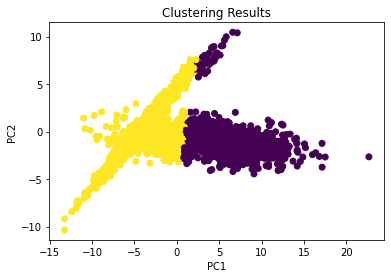

In [12]:
# Apply k-means clustering with the optimum number of clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Visualize the clustering results using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clustering Results')
plt.show()

In this case, both curves suggest that the optimum number of clusters is 2. Therefore, we apply k-means clustering with 2 clusters and visualize the results using PCA. The PCA plot shows that the clustering separates the data points into 2 distinct groups.

Insert conclusions

# Question 2
- Using `X_train` and `y_train`, create a logistic regression model. Then evaluate the performance on the test data. The only preprocessing steps you should include are scaling and one hot encoding.    
- Using cross-validation and grid search on the regularization strength using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

In [13]:
X_train.columns

Index(['var0', 'var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8',
       'var9', 'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'var16',
       'var17', 'var18', 'var19', 'var20', 'var21', 'var22', 'var23', 'var24',
       'var25', 'var26', 'var27', 'var28', 'var29', 'var30', 'var31', 'var32',
       'var33', 'var34', 'var35', 'var36', 'var37', 'var38', 'var39', 'var40',
       'var41', 'var42', 'var43', 'var44', 'var45', 'var46', 'var47', 'var48',
       'var49'],
      dtype='object')

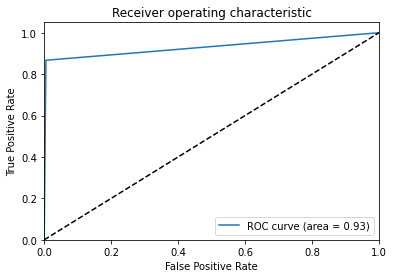

Accuracy: 0.93
Precision: 0.9943502824858758
Recall: 0.8669950738916257


In [14]:
# Insert Code
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score

# Define the columns to be one hot encoded
categorical_cols = X_train.columns[:3]
numerical_cols = X_train.columns[3:]

# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(), categorical_cols),
        ('scaling', StandardScaler(), numerical_cols)
    ])

# Define the pipeline
pipeline = Pipeline([
    ('transformer', ct),
    ('log_reg', LogisticRegression(max_iter=1000))])

# Define the hyperparameters to be tuned
hyperparameters = {'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
grid_search2 = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1)
grid_search2.fit(X_train, y_train)

# Evaluate the performance of the model on the test data
y_pred = grid_search2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Insert conclusions
with logistic regression there is an accuracy of 93 percent with very good precesion and decent recall. the area under curve is 0.93 

# Question 3
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses PCA.  
- Perform a grid search on various number of components and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

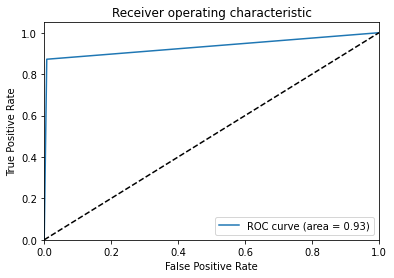

Accuracy: 0.93125
Precision: 0.9915966386554622
Recall: 0.8719211822660099


In [15]:
# Insert code

# Define the column transformer
ct = ColumnTransformer(
    transformers=[
        ('one_hot', OneHotEncoder(), categorical_cols),
        ('scaling', StandardScaler(), numerical_cols)
    ])

# Define the pipeline with PCA
pipeline = Pipeline([
    ('transformer', ct),
    ('pca', PCA(n_components=2)),
    ('log_reg', LogisticRegression(max_iter=1000))])

# Define the hyperparameters to be tuned
hyperparameters = {
    'pca__n_components': [2, 3, 4], 
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search3 = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1)
grid_search3.fit(X_train, y_train)

# Evaluate the performance of the model on the test data
y_pred = grid_search3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Insert conclusions
with using PCA before logistic regression there is no much significant difference in performance, rather the performance decreased very little because pca decreases the training data features. However with large difference in input data to logistic regression the model still generates almost similar performance as regular logistic regression

# Question 4
- Using `X_train` and `y_train`, create a logistic regression model, that includes a pipeline step that uses k-means clustering as a processing step.  
- Use grid search and evaluate multiple cluster numbers and regularization strengths using best practices.
- Provide a ROC chart and provide accuracy, precision, and recall.  
- What is your opinion of the model's performance?

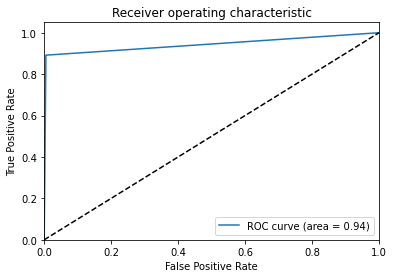

Accuracy: 0.9425
Precision: 0.9945054945054945
Recall: 0.8916256157635468


In [16]:
# Insert code


# Define the pipeline
pipeline = Pipeline([
    ('preprocessing', ct),
    ('kmeans', KMeans(n_init=2)),
    ('log_reg', LogisticRegression())
])

# Define the hyperparameters to be tuned
hyperparameters = {
    'kmeans__n_clusters': [2, 3, 4],
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Perform grid search with cross-validation
grid_search4 = GridSearchCV(pipeline, hyperparameters, cv=5, n_jobs=-1)
grid_search4.fit(X_train, y_train)

# Evaluate the performance of the model on the test data
y_pred = grid_search4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Print the evaluation metrics
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Insert conclusions
The accuracy and recall both increased when clustered using kmeans, with k-means the data is clustered into similar clusters and then they are classified which increases the performance of the model

# Question 5
- Which model, based on the results of `Questions 2-4` would you recommend to use?  
- Use as much code as necessary to support your choice.

Insert response, the model in quesstion 4 

The model which uses kmeans clustering before logistic regression is better because it gives better results on the test data

In [17]:
def print_metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('ROC AUC:', roc_auc)


In [18]:
# Evaluate the logistic regression model from Question 2
print('Logistic Regression (Question 2):')
print_metrics(grid_search2, X_test, y_test)
print()

# Evaluate the logistic regression model with PCA from Question 3
print('Logistic Regression with PCA (Question 3):')
print_metrics(grid_search3, X_test, y_test)
print()

# Evaluate the logistic regression model with KMeans clustering from Question 4
print('Logistic Regression with KMeans Clustering (Question 4):')
print_metrics(grid_search4, X_test, y_test)


Logistic Regression (Question 2):
Accuracy: 0.93
Precision: 0.9943502824858758
Recall: 0.8669950738916257
ROC AUC: 0.930959465879823

Logistic Regression with PCA (Question 3):
Accuracy: 0.93125
Precision: 0.9915966386554622
Recall: 0.8719211822660099
ROC AUC: 0.9321534845340201

Logistic Regression with KMeans Clustering (Question 4):
Accuracy: 0.9425
Precision: 0.9945054945054945
Recall: 0.8916256157635468
ROC AUC: 0.9432747368157834
